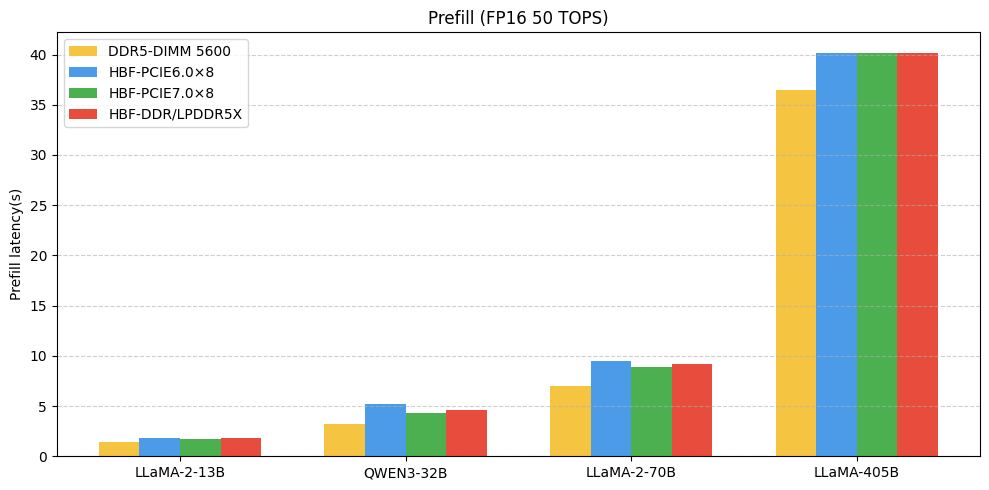

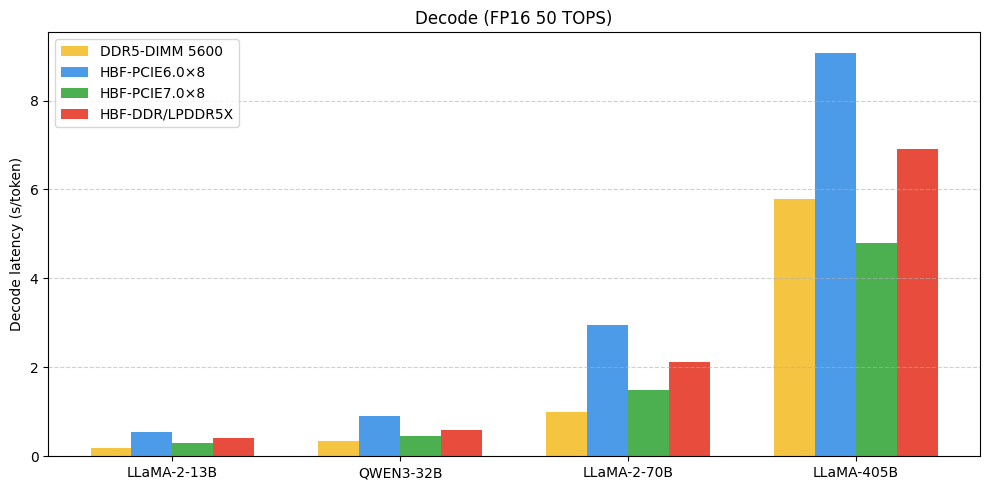

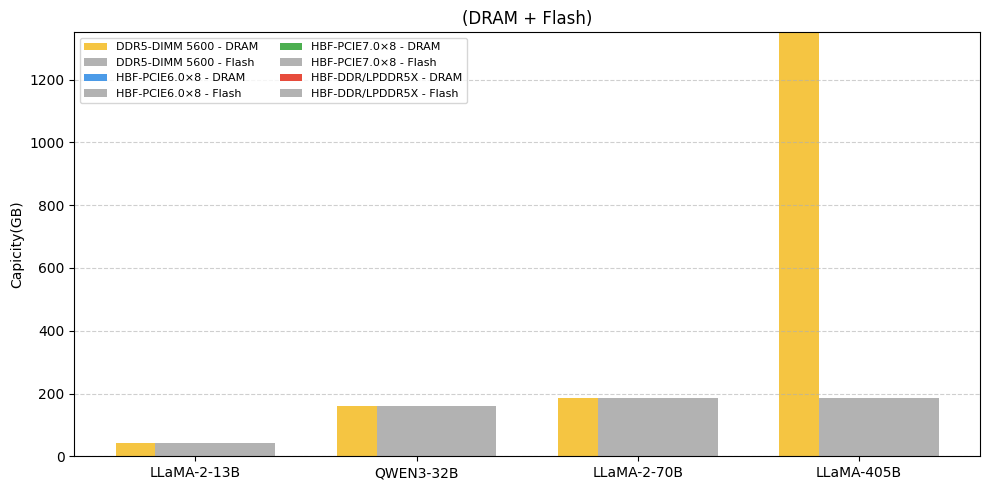

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# 基础配置
# =========================
models = ["LLaMA-2-13B", "QWEN3-32B", "LLaMA-2-70B", "LLaMA-405B"]
configs = ["DDR5-DIMM 5600", "HBF-PCIE6.0×8", "HBF-PCIE7.0×8", "HBF-DDR/LPDDR5X"]

colors = ["#F5C542", "#4C9BE8", "#4CAF50", "#E74C3C"]

# =========================
# 1. Prefill 性能（秒）
# =========================
prefill_latency = {
    "DDR5-DIMM 5600": [1.40, 3.22, 7.01, 36.5],
    "HBF-PCIE6.0×8": [1.78, 5.16, 9.50, 40.2],
    "HBF-PCIE7.0×8": [1.77, 4.31, 8.84, 40.2],
    "HBF-DDR/LPDDR5X": [1.78, 4.65, 9.14, 40.2],
}

# =========================
# 2. Decode 性能（秒）
# =========================
decode_latency = {
    "DDR5-DIMM 5600": [0.193, 0.3415, 0.995, 5.78],
    "HBF-PCIE6.0×8": [0.5551, 0.8966, 2.96, 9.08],
    "HBF-PCIE7.0×8": [0.2898, 0.4602, 1.49, 4.80],
    "HBF-DDR/LPDDR5X": [0.4009, 0.6017, 2.12, 6.90],
}

# =========================
# 3. 存储使用（GB）
# =========================
dram_usage = {
    "DDR5-DIMM 5600": [41, 161, 185, 1351],
    "HBF-PCIE6.0×8": [1, 1, 1, 1],
    "HBF-PCIE7.0×8": [1, 1, 1, 1],
    "HBF-DDR/LPDDR5X": [1, 1, 1, 1],
}

flash_usage = {
    "DDR5-DIMM 5600": [0, 0, 0, 0],
    "HBF-PCIE6.0×8": [40, 160, 184, 184],
    "HBF-PCIE7.0×8": [40, 160, 184, 184],
    "HBF-DDR/LPDDR5X": [40, 160, 184, 184],
}

# =========================
# 绘图工具函数
# =========================
def plot_bar(metric, ylabel, title):
    x = np.arange(len(models))
    width = 0.18

    plt.figure(figsize=(10, 5))
    for i, cfg in enumerate(configs):
        plt.bar(x + i * width, metric[cfg], width, label=cfg, color=colors[i])

    plt.xticks(x + width * 1.5, models)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# =========================
# 1️⃣ Prefill 对比
# =========================
plot_bar(
    prefill_latency,
    ylabel="Prefill latency(s)",
    title="Prefill (FP16 50 TOPS)",
)

# =========================
# 2️⃣ Decode 对比
# =========================
plot_bar(
    decode_latency,
    ylabel="Decode latency (s/token)",
    title="Decode (FP16 50 TOPS)",
)

# =========================
# 3️⃣ 存储使用（DRAM + Flash 堆叠）
# =========================
x = np.arange(len(models))
width = 0.18

plt.figure(figsize=(10, 5))
for i, cfg in enumerate(configs):
    plt.bar(
        x + i * width,
        dram_usage[cfg],
        width,
        label=f"{cfg} - DRAM",
        color=colors[i],
    )
    plt.bar(
        x + i * width,
        flash_usage[cfg],
        width,
        bottom=dram_usage[cfg],
        label=f"{cfg} - Flash",
        color="gray",
        alpha=0.6,
    )

plt.xticks(x + width * 1.5, models)
plt.ylabel("Capicity(GB)")
plt.title("(DRAM + Flash)")
plt.legend(ncol=2, fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()